In [ ]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [ ]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">Support Vector Machines</h1>

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" align="left">

Support vector machines basically create a hyperplane that best seperates our data into 2 halves. This is done by adjusting the position of the hyperplane is furthest away from each side of the dataset while producing the maximum accuracy. SVM's are highly used in classification algorithms with high dimensions, so we would expect it to work well here.


In [ ]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM: {}".format(accuracy_score(y_test,y_pred)))

SVM: 0.7730802415875755


Again, we have multiple hyperparemeters to test, so we assume they are independent and test them one by one:

In [ ]:
#Degree if polynomial kernel:

degrees = [1,2,3,4,5,6]
res = []

for i in degrees:
  model = SVC(kernel='poly', degree=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  res.append(accuracy_score(y_test,y_pred))
  print("SVM polynomial degree={}: {}".format(i,accuracy_score(y_test,y_pred)))

SVM polynomial degree=1: 0.7523727351164797
SVM polynomial degree=2: 0.730802415875755
SVM polynomial degree=3: 0.6790336496980155
SVM polynomial degree=4: 0.6686798964624676
SVM polynomial degree=5: 0.6600517687661778
SVM polynomial degree=6: 0.6522864538395168


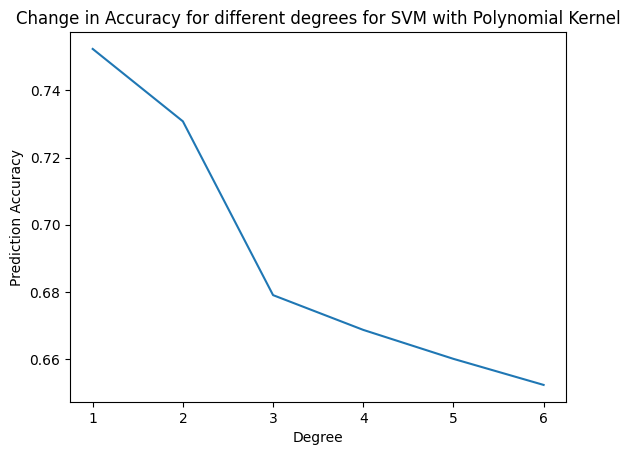

In [ ]:
plt.title('Change in Accuracy for different degrees for SVM with Polynomial Kernel')
plt.xlabel('Degree')
plt.ylabel('Prediction Accuracy')
 
plt.plot(degrees,res)

Which tells us that a polynomial kernel might not be the best option

In [ ]:
#Kernel

model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM Linear: {}".format(accuracy_score(y_test,y_pred)))

model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM RBF: {}".format(accuracy_score(y_test,y_pred)))

model = SVC(kernel='sigmoid')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM Sigmoid: {}".format(accuracy_score(y_test,y_pred)))

SVM Linear: 0.7532355478861087
SVM RBF: 0.7730802415875755
SVM Sigmoid: 0.7351164797238999


Hence, the default rbf kernel works optimally

In [ ]:
#Gamma:

model = SVC(gamma='scale')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM gamma=scale: {}".format(accuracy_score(y_test,y_pred)))

model = SVC(gamma='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("SVM gamma=auto: {}".format(accuracy_score(y_test,y_pred)))

SVM gamma=scale: 0.7730802415875755
SVM gamma=auto: 0.7057808455565142


So the default gamma hyperparameter is still the best

In [ ]:
#C:

Cs = np.linspace(0.2,3,15)
res = []

for i in Cs:
  model = SVC(C=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  res.append(accuracy_score(y_test,y_pred))
  print("SVM C = {}: {}".format(i,accuracy_score(y_test,y_pred)))

SVM C = 0.2: 0.7014667817083693
SVM C = 0.4: 0.7420189818809318
SVM C = 0.6: 0.7592752372735116
SVM C = 0.8: 0.7679033649698016
SVM C = 1.0: 0.7730802415875755
SVM C = 1.2: 0.7799827437446074
SVM C = 1.4: 0.7765314926660914
SVM C = 1.5999999999999999: 0.7791199309749784
SVM C = 1.7999999999999998: 0.7773943054357204


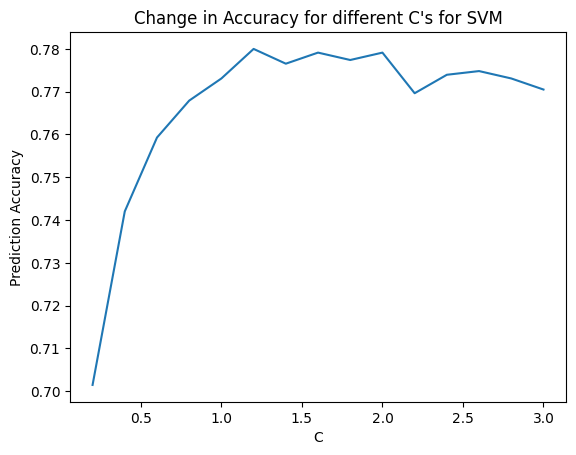

In [21]:
plt.title('Change in Accuracy for different C\'s for SVM')
plt.xlabel('C')
plt.ylabel('Prediction Accuracy')
 
plt.plot(Cs,res)

Which tells us a $C$ of around $1.25$ is optimal, giving us the hypoerparameters for the optimal SVM.